Let $t_i$ denote the times of instant events in a continuous process, resulting in event function
<table><tr><td>
  $S(t) = \sum_i \delta(t - t_i)$
</td></tr></table>

The integrator filter is defined by the below equation, increasing with every spike, and decaying over time with a given time constant
<table><tr><td>
  $\dot{r}(t) = S(t) - \frac{r}{\tau}$
</td></tr></table>

The average rate can then be computed by taking the time-average $\langle f\rangle_T = \frac{1}{T}\int_0^T f(t)dT$ of the ODE. Note that for a fixed rate input, the net rate change should be 0.
<table><tr><td>
$
\begin{eqnarray}
  \langle \dot{r}(t) \rangle_T &=& \langle S(t) \rangle_T - \frac{\langle r \rangle_T}{\tau} \\
  0 &=& \bar{s} - \frac{\bar{r}}{\tau} \\
  \bar{s} &=& \frac{\bar{r}}{\tau}
\end{eqnarray}
$
</td></tr></table>

It hence makes sense to re-define the rate variable $R(t) = \frac{r(t)}{\tau}$, resulting in ODE
<table><tr><td>
  $\tau \dot{R}(t) = S(t) - R(t)$
</td></tr></table>

The equation can be discretized, assuming $s_i$ counts the number of events within the time interval $i$.
<table><tr><td>
  $R_{i+1} = R_i + \frac{1}{\tau}s_i - \frac{\Delta t}{\tau} R_i = (1 - \frac{\Delta t}{\tau}) R_i + \frac{1}{\tau}s_i$
</td></tr></table>

200


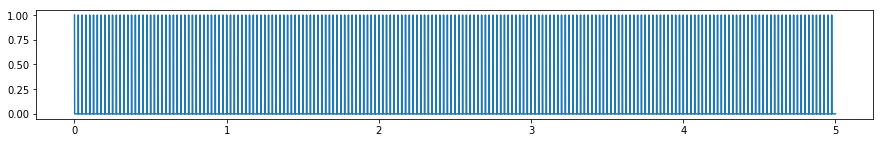

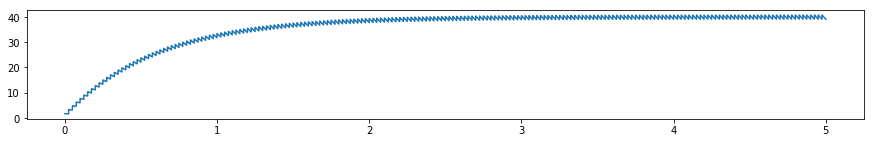

average rate is 39.7225734449


In [88]:
import numpy as np
import matplotlib.pyplot as plt


fEventsPerSec = 40
TIME_TOT = 5
nTimeStep = 10000

nExpectedEvent = fEventsPerSec * TIME_TOT
pEventPerTimeStep = nExpectedEvent / nTimeStep
times = np.linspace(0, TIME_TOT, nTimeStep)
#eventFunction = (np.random.uniform(0, 1, nTimeStep) <= pEventPerTimeStep).astype(int)

eventPeriodTimeStep = int(1 / pEventPerTimeStep)
eventFunction = (np.array(list(range(nTimeStep))) % eventPeriodTimeStep == 0).astype(int)

print(np.sum(eventFunction))

plt.figure(figsize=(15, 2))
plt.plot(times, eventFunction)
plt.show()

dt = TIME_TOT / nTimeStep
tau = 0.6
alpha = dt / tau

integralEvents = np.zeros(nTimeStep+1)
for i in range(nTimeStep):
    integralEvents[i+1] = integralEvents[i] * (1 - alpha) + eventFunction[i] / tau

plt.figure(figsize=(15, 2))
plt.plot(times, integralEvents[1:])
plt.show()

print("average rate is", np.average(integralEvents[4000:]))